In [ ]:
"""Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion 
matrix, accuracy, error rate, precision and recall on the given dataset. 
Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes """

In [4]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\abc\Downloads\ML,DAA,BT PR\ML\ML PR3\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
# input

x = df.drop('Outcome',axis =1)
 
# output

y= df[['Outcome']]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [10]:
y.value_counts()

Outcome
0          500
1          268
Name: count, dtype: int64

In [13]:
# feature scalling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)

x_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [15]:
# Cross Validation

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state = 0, test_size = 0.25)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train,y_train)


C:\Users\abc\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [18]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [21]:
y_pred = knn.predict(x_test)

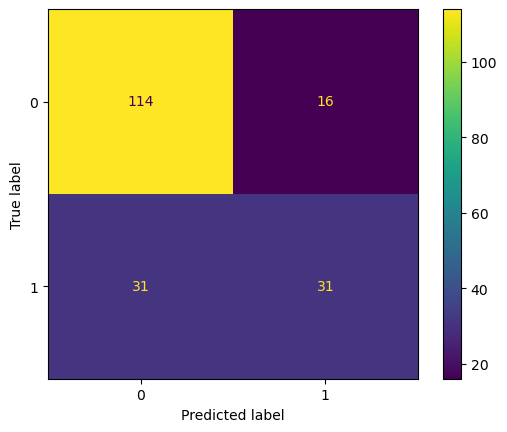

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192

